In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction
The dataset has the crimes data of two major cities; London and Manchester, with information about the place of crime, type and outcome.

The analysis tries to answer the questions; **Which city has more crimes? What type crime is the most common? Do we have a crime concentration and is it changing over years?**

## Gather Data

In [2]:
data = pd.read_csv("clean_data.csv")
data.sample(5)

,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category,year,month
57832,Greater Manchester Police,-2.075924,53.389822,Peacefield,Stockport 029C,Violence and sexual offences,Unable to prosecute suspect,2015,4
163481,Greater Manchester Police,-2.465663,53.565886,Carlton Avenue,Bolton 018B,Violence and sexual offences,Unable to prosecute suspect,2015,11
109025,Greater Manchester Police,-2.116457,53.481733,Manchester Road,Tameside 013C,Violence and sexual offences,Investigation complete; no suspect identified,2015,7
550949,Greater Manchester Police,-2.229531,53.484293,Cotton Street,Manchester 055D,Criminal damage and arson,Investigation complete; no suspect identified,2017,7
106230,Greater Manchester Police,-2.248187,53.504947,Baydon Avenue,Salford 016D,Other theft,Investigation complete; no suspect identified,2015,7


### Much more crimes falls within Greater Manchester

In [3]:
temp = data.groupby("Falls within").size() / data.shape[0] * 100
temp = temp.reset_index().rename(columns={0: "percentage"})
temp

,Falls within,percentage
0,City of London Police,2.263125
1,Greater Manchester Police,97.736875


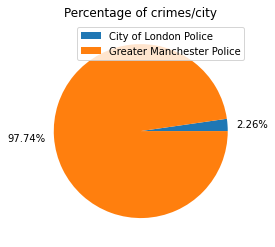

In [4]:
fig = plt.Figure(figsize=(8, 8))

labels = temp["percentage"].map(lambda p: f"{round(p, 2)}%")

plt.pie(temp["percentage"], labels=labels);
plt.legend(temp["Falls within"])
plt.title("Percentage of crimes/city")
plt.show()

### Hence we will focus on Manchester
### and there the most common crime type is '**Violence and sexual offences**'

In [70]:
mask = data["Falls within"] == "Greater Manchester Police"
data = data[mask].copy()

In [71]:
temp = data["Crime type"].value_counts() / data.shape[0] * 100
temp = temp.reset_index().rename(columns={"index": "Crime type", "Crime type": "percentage"})
temp

,Crime type,percentage
0,Violence and sexual offences,29.000325
1,Criminal damage and arson,13.477905
2,Public order,11.828939
3,Burglary,11.270355
4,Vehicle crime,10.315387
5,Other theft,8.706784
6,Shoplifting,4.745080
7,Other crime,2.366402
8,Robbery,2.109524
9,Drugs,1.987409


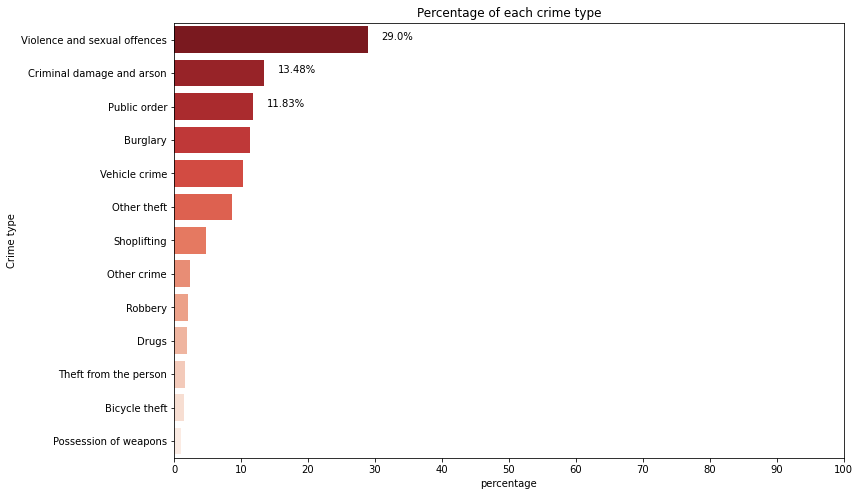

In [72]:
plt.figure(figsize=(12, 8))

g = sns.barplot(y=temp["Crime type"], x=temp["percentage"], palette="Reds_r");

for index, row in temp.iterrows():
    g.text(row["percentage"] + 2, index, f"{round(row['percentage'], 2)}%")
    if index == 2:
        break

plt.title("Percentage of each crime type")
plt.xticks(ticks=range(0, 101, 10))
plt.show()

### Hence we will focus on type **Violence and sexual offences**
### and yet most of them is not solved

In [73]:
outcome_to_main = {
    "Unable to prosecute suspect": "Pending",
    "Investigation complete; no suspect identified": "Pending",
    "Status update unavailable": "Pending",
    "Court result unavailable": "Pending",
    "Local resolution": "Solved",
    "Further investigation is not in the public interest": "Pending",
    "Under investigation": "Pending",
    "Offender given a caution": "Solved",
    "Offender given community sentence": "Solved",
    "Offender sent to prison": "Solved",
    "Defendant found not guilty": "Solved",
    "Formal action is not in the public interest": "Pending",
    "Awaiting court outcome": "Pending",
    "Offender given suspended prison sentence": "Solved",
    "Offender given conditional discharge": "Solved",
    "Court case unable to proceed": "Pending",
    "Offender fined": "Solved",
    "Offender otherwise dealt with": "Solved",
    "Action to be taken by another organisation": "Solved",
    "Offender given penalty notice": "Solved",
    "Offender ordered to pay compensation": "Solved",
    "Defendant sent to Crown Court": "Solved",
    "Offender given absolute discharge": "Solved",
    "Suspect charged as part of another case": "Solved",
    "Offender given a drugs possession warning": "Solved"
}

data["Outcome main category"] = data["Last outcome category"].map(outcome_to_main)

In [74]:
mask = data["Crime type"] == "Violence and sexual offences"
data = data[mask].copy()

In [75]:
temp = data["Outcome main category"].value_counts() / data.shape[0] * 100
temp = temp.reset_index().rename(columns={"index": "Outcome Category"
                                          , "Outcome main category": "percentage"})
temp

,Outcome Category,percentage
0,Pending,89.327073
1,Solved,10.672927


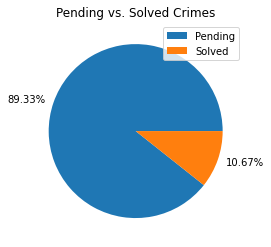

In [76]:
fig = plt.Figure(figsize=(8, 8))

labels = temp["percentage"].map(lambda p: f"{round(p, 2)}%")

plt.pie(temp["percentage"], labels=labels);
plt.legend(temp["Outcome Category"])
plt.title("Pending vs. Solved Crimes")
plt.show()

### Crimes are concentrated in few areas and most of the areas doesn't change over years

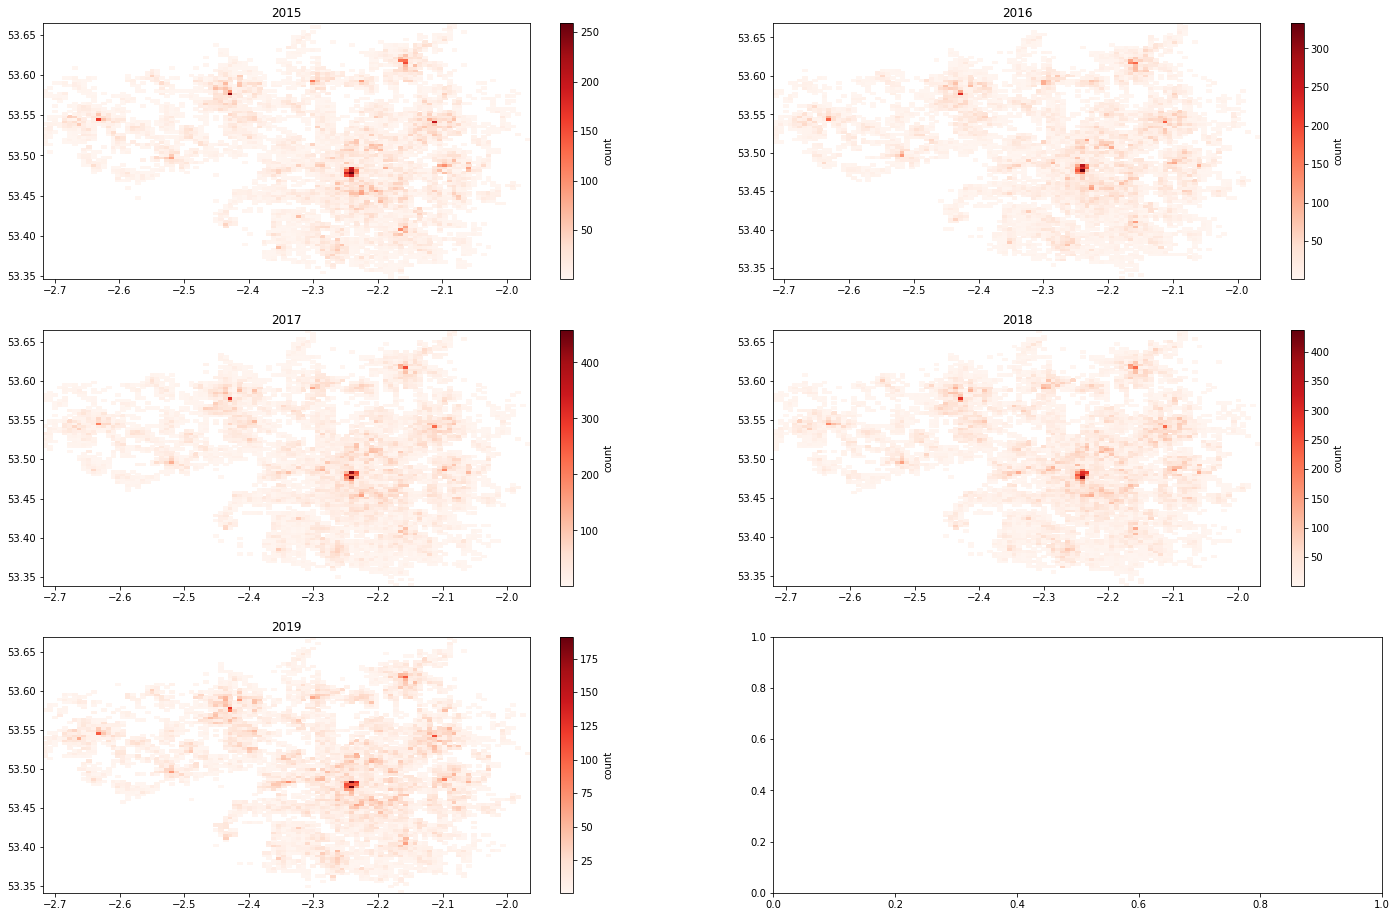

In [78]:
fig, axes = plt.subplots(3, 2, figsize=(24, 16))
axes = axes.flatten()

for i, year in enumerate(range(2015, 2020)):
    mask = data["year"] == year
    temp = data[mask]
    h = axes[i].hist2d(temp["Longitude"], temp["Latitude"], bins=100, cmap="Reds", cmin=1)
    axes[i].set_title(f"{year}")

    fig.colorbar(h[3], label = 'count', ax=axes[i])

### Areas' crime concentration decreases over years, despite of crime count increase

In [107]:
# divide the city to 100 area
lat_cats = pd.cut(data["Latitude"], 100, labels=False).astype(int)
lng_cats = pd.cut(data["Longitude"], 100, labels=False).astype(int)


In [108]:
# count the number of crimes for each area in each year
pts_per_bin = data.groupby([data["year"], lat_cats, lng_cats]).size()
pts_per_bin = pts_per_bin.reset_index().rename(columns={0: "count"})
pts_per_bin = pts_per_bin.sort_values("count", ascending=False) 
pts_per_bin

,year,Latitude,Longitude,count
12920,2018,42,63,411
8961,2017,42,63,388
9071,2017,44,63,331
13032,2018,44,63,315
5086,2016,42,63,313
...,...,...,...,...
11139,2017,79,26,1
11152,2017,79,51,1
11156,2017,79,55,1
11174,2017,79,79,1


In [113]:
# take the top five places in terms of crime concentration
def trim_groups_and_add_pct(group):
    group["percentage"] = group["count"] / group["count"].sum() * 100
    return group.head()

temp = pts_per_bin.groupby("year").apply(trim_groups_and_add_pct)
temp

year  Latitude  Longitude  count  percentage
year                                                    
2015 1319   2015        42         63    271    0.559940
     3064   2015        72         38    238    0.491756
     1429   2015        44         63    234    0.483491
     3557   2015        84         74    218    0.450432
     1374   2015        43         63    199    0.411174
2016 5086   2016        42         63    313    0.554463
     5196   2016        44         63    259    0.458805
     5140   2016        43         63    230    0.407433
     6850   2016        72         38    229    0.405662
     7369   2016        84         74    207    0.366690
2017 8961   2017        42         63    388    0.474177
     9071   2017        44         63    331    0.404517
     9017   2017        43         63    291    0.355633
     10791  2017        72         38    270    0.329968
     11332  2017        84         74    255    0.311637
2018 12920  2018        42         63    411    0.491034
     13032  2018        44         63    315    0.376340
     12975  2018        43         63    296    0.353640
     14759  2018        72         38    262    0.313019
     12919  2018        42         62    242    0.289124
2019 16785  2019        42         63    172    0.415048
     16894  2019        44         63    149    0.359547
     16841  2019        43         63    141    0.340243
     18512  2019        72         38    132    0.318525
     16895  2019        44         64    121    0.291981

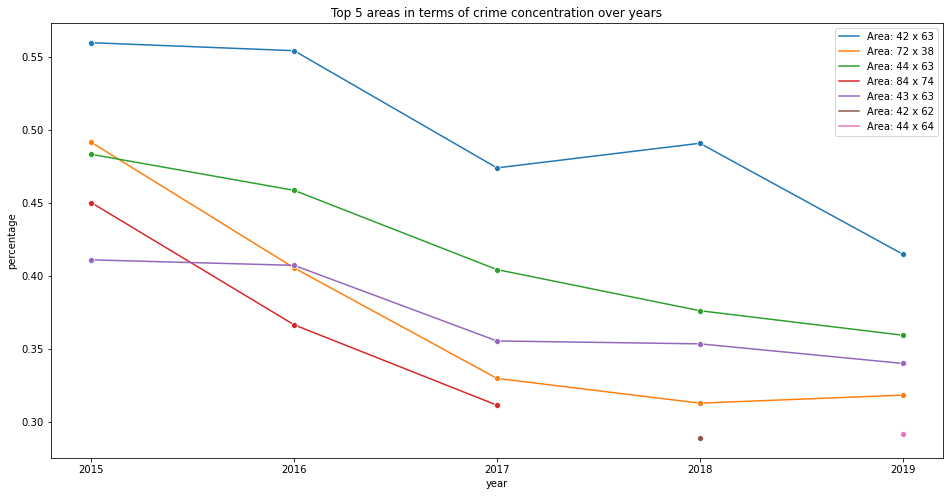

In [127]:
plt.figure(figsize=(16, 8))
legends = "Area: " + temp["Latitude"].astype(str) + " x " + temp["Longitude"].astype(str)
sns.lineplot(x=temp["year"], y=temp["percentage"], hue=legends, marker="o")
plt.xticks(range(2015, 2020))
plt.title("Top 5 areas in terms of crime concentration over years");

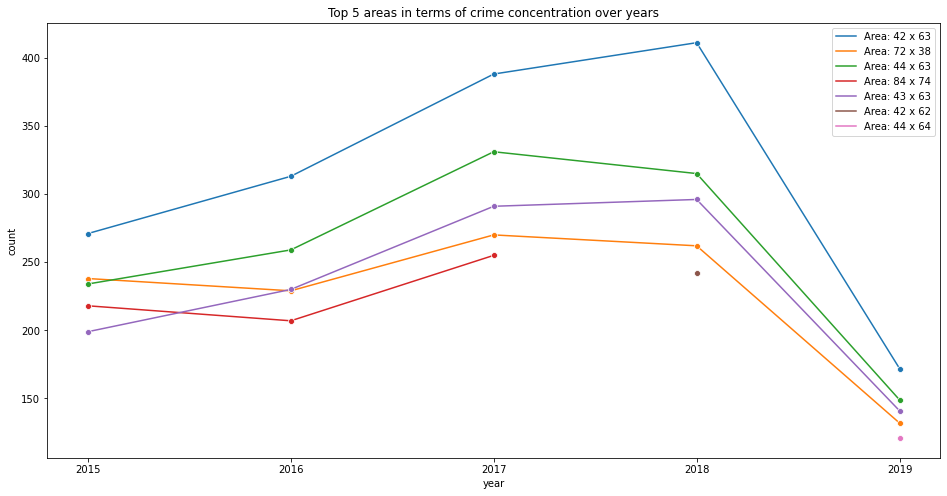

In [128]:
plt.figure(figsize=(16, 8))
legends = "Area: " + temp["Latitude"].astype(str) + " x " + temp["Longitude"].astype(str)
sns.lineplot(x=temp["year"], y=temp["count"], hue=legends, marker="o")
plt.xticks(range(2015, 2020))
plt.title("Top 5 areas in terms of crime concentration over years");

## Conclusion
Crime concentration is noticed in Manchester for the crimes of '**Violence and sexual offences**', and however the number of crimes increased in the last few years except for 2019, the concentration decreased, and more over 2 new concentration areas appeard which may indicate that crimes are spreading to new places